# LAB | Feature Engineering

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [137]:

#from dfply import *

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import precision_score


In [121]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [122]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [123]:
spaceship.shape

(8693, 14)

**Check for data types**

In [124]:
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Check for missing values**

In [125]:
spaceship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [126]:
spaceship=spaceship.dropna(how="any")
spaceship.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6606 non-null   object 
 1   HomePlanet    6606 non-null   object 
 2   CryoSleep     6606 non-null   object 
 3   Cabin         6606 non-null   object 
 4   Destination   6606 non-null   object 
 5   Age           6606 non-null   float64
 6   VIP           6606 non-null   object 
 7   RoomService   6606 non-null   float64
 8   FoodCourt     6606 non-null   float64
 9   ShoppingMall  6606 non-null   float64
 10  Spa           6606 non-null   float64
 11  VRDeck        6606 non-null   float64
 12  Name          6606 non-null   object 
 13  Transported   6606 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 729.0+ KB


- **Cabin** is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [127]:
spaceship['Cabin'].value_counts()

Cabin
G/1476/S    7
E/13/S      7
C/137/S     7
G/734/S     7
B/11/S      7
           ..
E/233/S     1
E/209/P     1
G/548/S     1
D/108/P     1
B/153/P     1
Name: count, Length: 5305, dtype: int64

In [128]:
spaceship['Cabin_Category']=spaceship['Cabin'].str[0]

In [129]:
spaceship['Cabin_Category']

0       B
1       F
2       A
3       A
4       F
       ..
8688    A
8689    G
8690    G
8691    E
8692    E
Name: Cabin_Category, Length: 6606, dtype: object

- Drop PassengerId and Name

In [130]:
spaceship=spaceship.drop(columns=["PassengerId", "Name"], axis=1)

- For non-numerical columns, do dummies.

In [131]:
spaceship.shape

(6606, 13)

In [132]:
dummies1 = pd.get_dummies(spaceship[['HomePlanet','Cabin_Category','Destination']], drop_first=True)
dummies1.shape

(6606, 11)

In [133]:
spaceship.reset_index(drop=True, inplace=True)
dummies1.reset_index(drop=True, inplace=True)


In [134]:
dummies1

,HomePlanet_Europa,HomePlanet_Mars,Cabin_Category_B,Cabin_Category_C,Cabin_Category_D,Cabin_Category_E,Cabin_Category_F,Cabin_Category_G,Cabin_Category_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,True,False,True,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True,False,False,False,True
2,True,False,False,False,False,False,False,False,False,False,True
3,True,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
6601,True,False,False,False,False,False,False,False,False,False,False
6602,False,False,False,False,False,False,False,True,False,True,False
6603,False,False,False,False,False,False,False,True,False,False,True
6604,True,False,False,False,False,True,False,False,False,False,False


In [135]:
spaceship=pd.concat([spaceship, dummies1], axis=1)

In [136]:
spaceship.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,HomePlanet_Mars,Cabin_Category_B,Cabin_Category_C,Cabin_Category_D,Cabin_Category_E,Cabin_Category_F,Cabin_Category_G,Cabin_Category_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,False,False,True
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,...,False,False,False,False,False,True,False,False,False,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,...,False,False,False,False,False,False,False,False,False,True
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,...,False,False,False,False,False,False,False,False,False,True
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,...,False,False,False,False,False,True,False,False,False,True


**Perform Train Test Split**

In [25]:
features = spaceship.drop(columns= ["Transported", "Cabin", "Destination", "HomePlanet", "Cabin_Category", "Age", "VIP","FoodCourt", "ShoppingMall", "Cabin_Category_D","Cabin_Category_E", "Cabin_Category_F", "Cabin_Category_G","Cabin_Category_T","Destination_PSO J318.5-22"	 ])
target=spaceship["Transported"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [27]:
features

,CryoSleep,RoomService,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Cabin_Category_B,Cabin_Category_C,Destination_TRAPPIST-1e
0,False,0.0,0.0,0.0,True,False,True,False,True
1,False,109.0,549.0,44.0,False,False,False,False,True
2,False,43.0,6715.0,49.0,True,False,False,False,True
3,False,0.0,3329.0,193.0,True,False,False,False,True
4,False,303.0,565.0,2.0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
6601,False,0.0,1643.0,74.0,True,False,False,False,False
6602,True,0.0,0.0,0.0,False,False,False,False,False
6603,False,0.0,1.0,0.0,False,False,False,False,True
6604,False,0.0,353.0,3235.0,True,False,False,False,False


**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

In [28]:
from sklearn.neighbors import KNeighborsClassifier


In [29]:
knn = KNeighborsClassifier(n_neighbors=10)

In [30]:
normalizer = MinMaxScaler()
normalizer.fit(X_train)

MinMaxScaler()

In [31]:
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [32]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)


In [33]:
knn.fit(X_train_norm, y_train)

KNeighborsClassifier(n_neighbors=10)

- Evaluate your model's performance. Comment it

In [34]:
knn.score(X_test_norm, y_test)

0.7813918305597579

In [35]:
pred = knn.predict(X_test_norm)

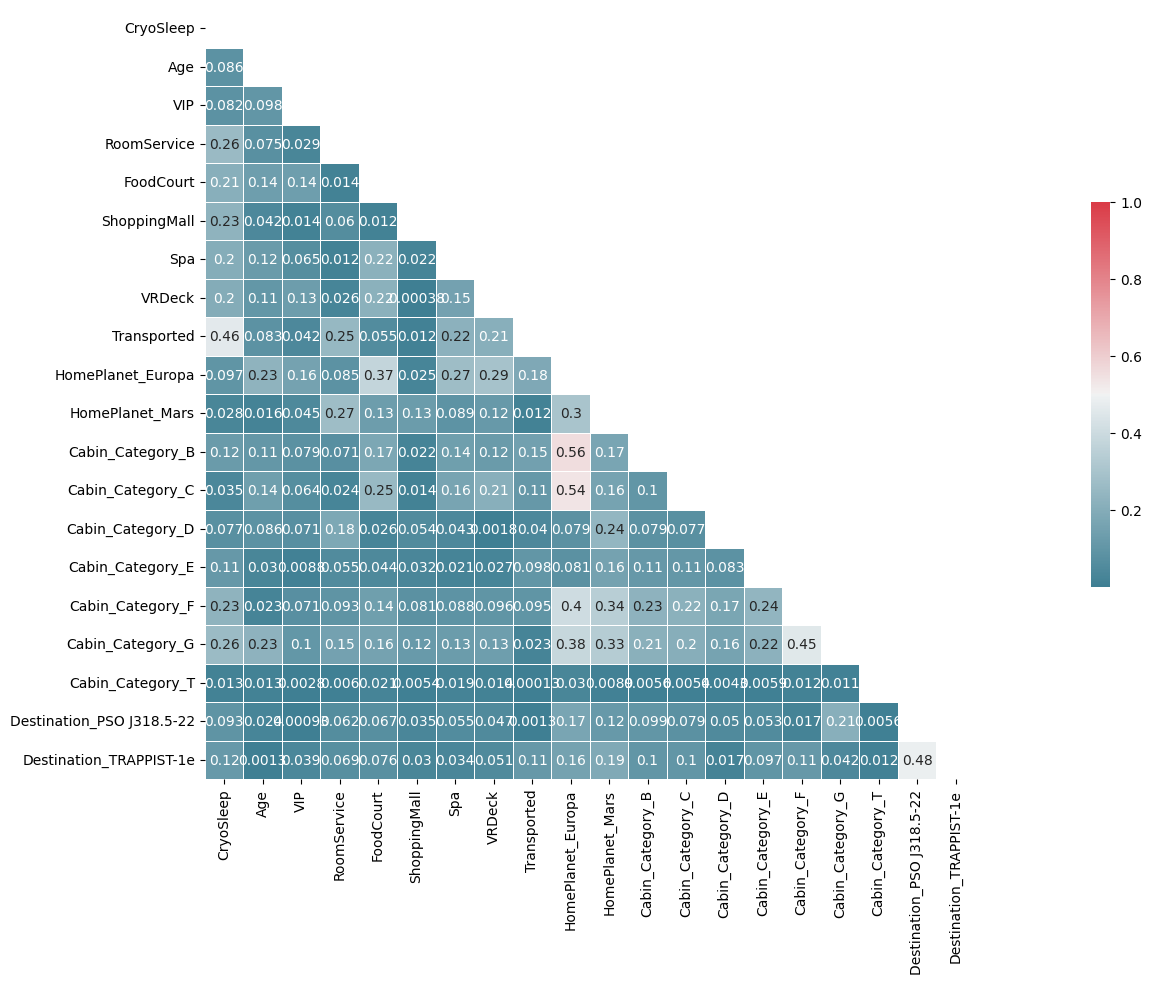

In [36]:
heatmap = spaceship.drop(columns= ["HomePlanet", "Cabin", "Destination", "Cabin_Category"])

corr = np.abs(heatmap.corr())

# Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [37]:
# Do we need all dummies for heatmapt (on the chart above we can see correlation only of the 2/3 home planets)
# for two categorical variables correlations we should look at chi squared test between the two